<a href="https://colab.research.google.com/github/andrejtodorovski/FoodAndDrinkz/blob/master/Lab_3_TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [4]:
import numpy as np
import pandas as pd


<font color = 'Orange'><li>Obtaining the Dataset</li>
<p> Reading the dataset from my local drive</p>

In [5]:
data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
X = data.drop('quality', axis = 1)
Y = data['quality']

<font color = 'Orange'><li>Describe the target value</li>
<p>The target value is the wine quality, which can be predicted using the other attributes in the dataset. If we get a new observation of a wine, we can calculate the wine quality.</p>


<font color = 'Orange'><li>Select is it classification or regression problem</li>
<p>
This is a classification problem, because the wine quality can be one of group of classes (3,4,5,6,7,8)
</p>

In [10]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb


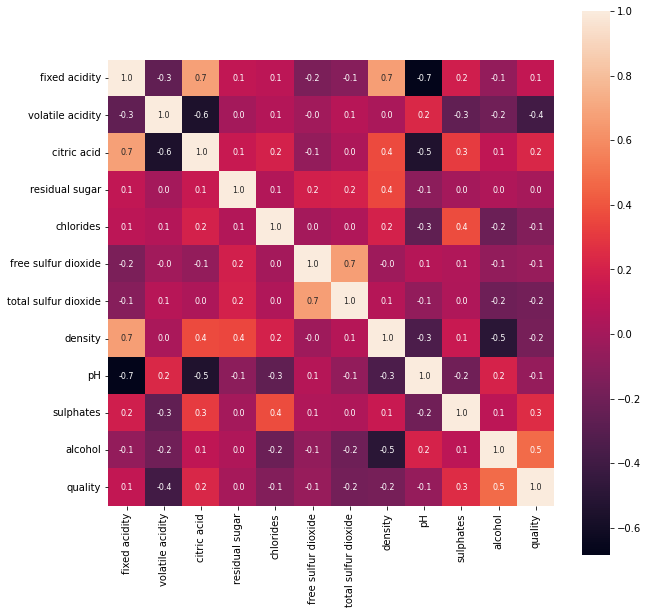

In [12]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8})

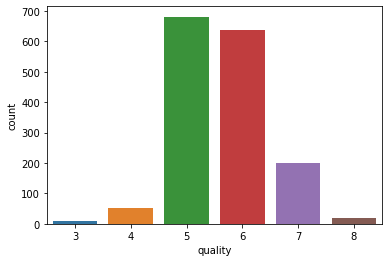

In [13]:
sb.countplot(x='quality', data=data)


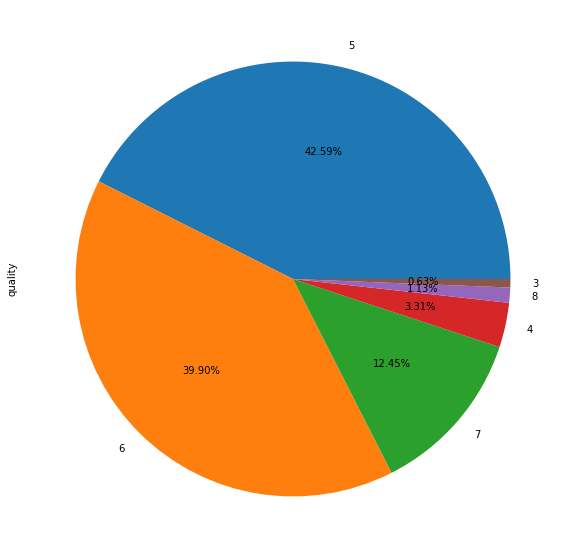

In [14]:
plt.figure(1, figsize=(10,10))
data['quality'].value_counts().plot.pie(autopct="%1.2f%%")

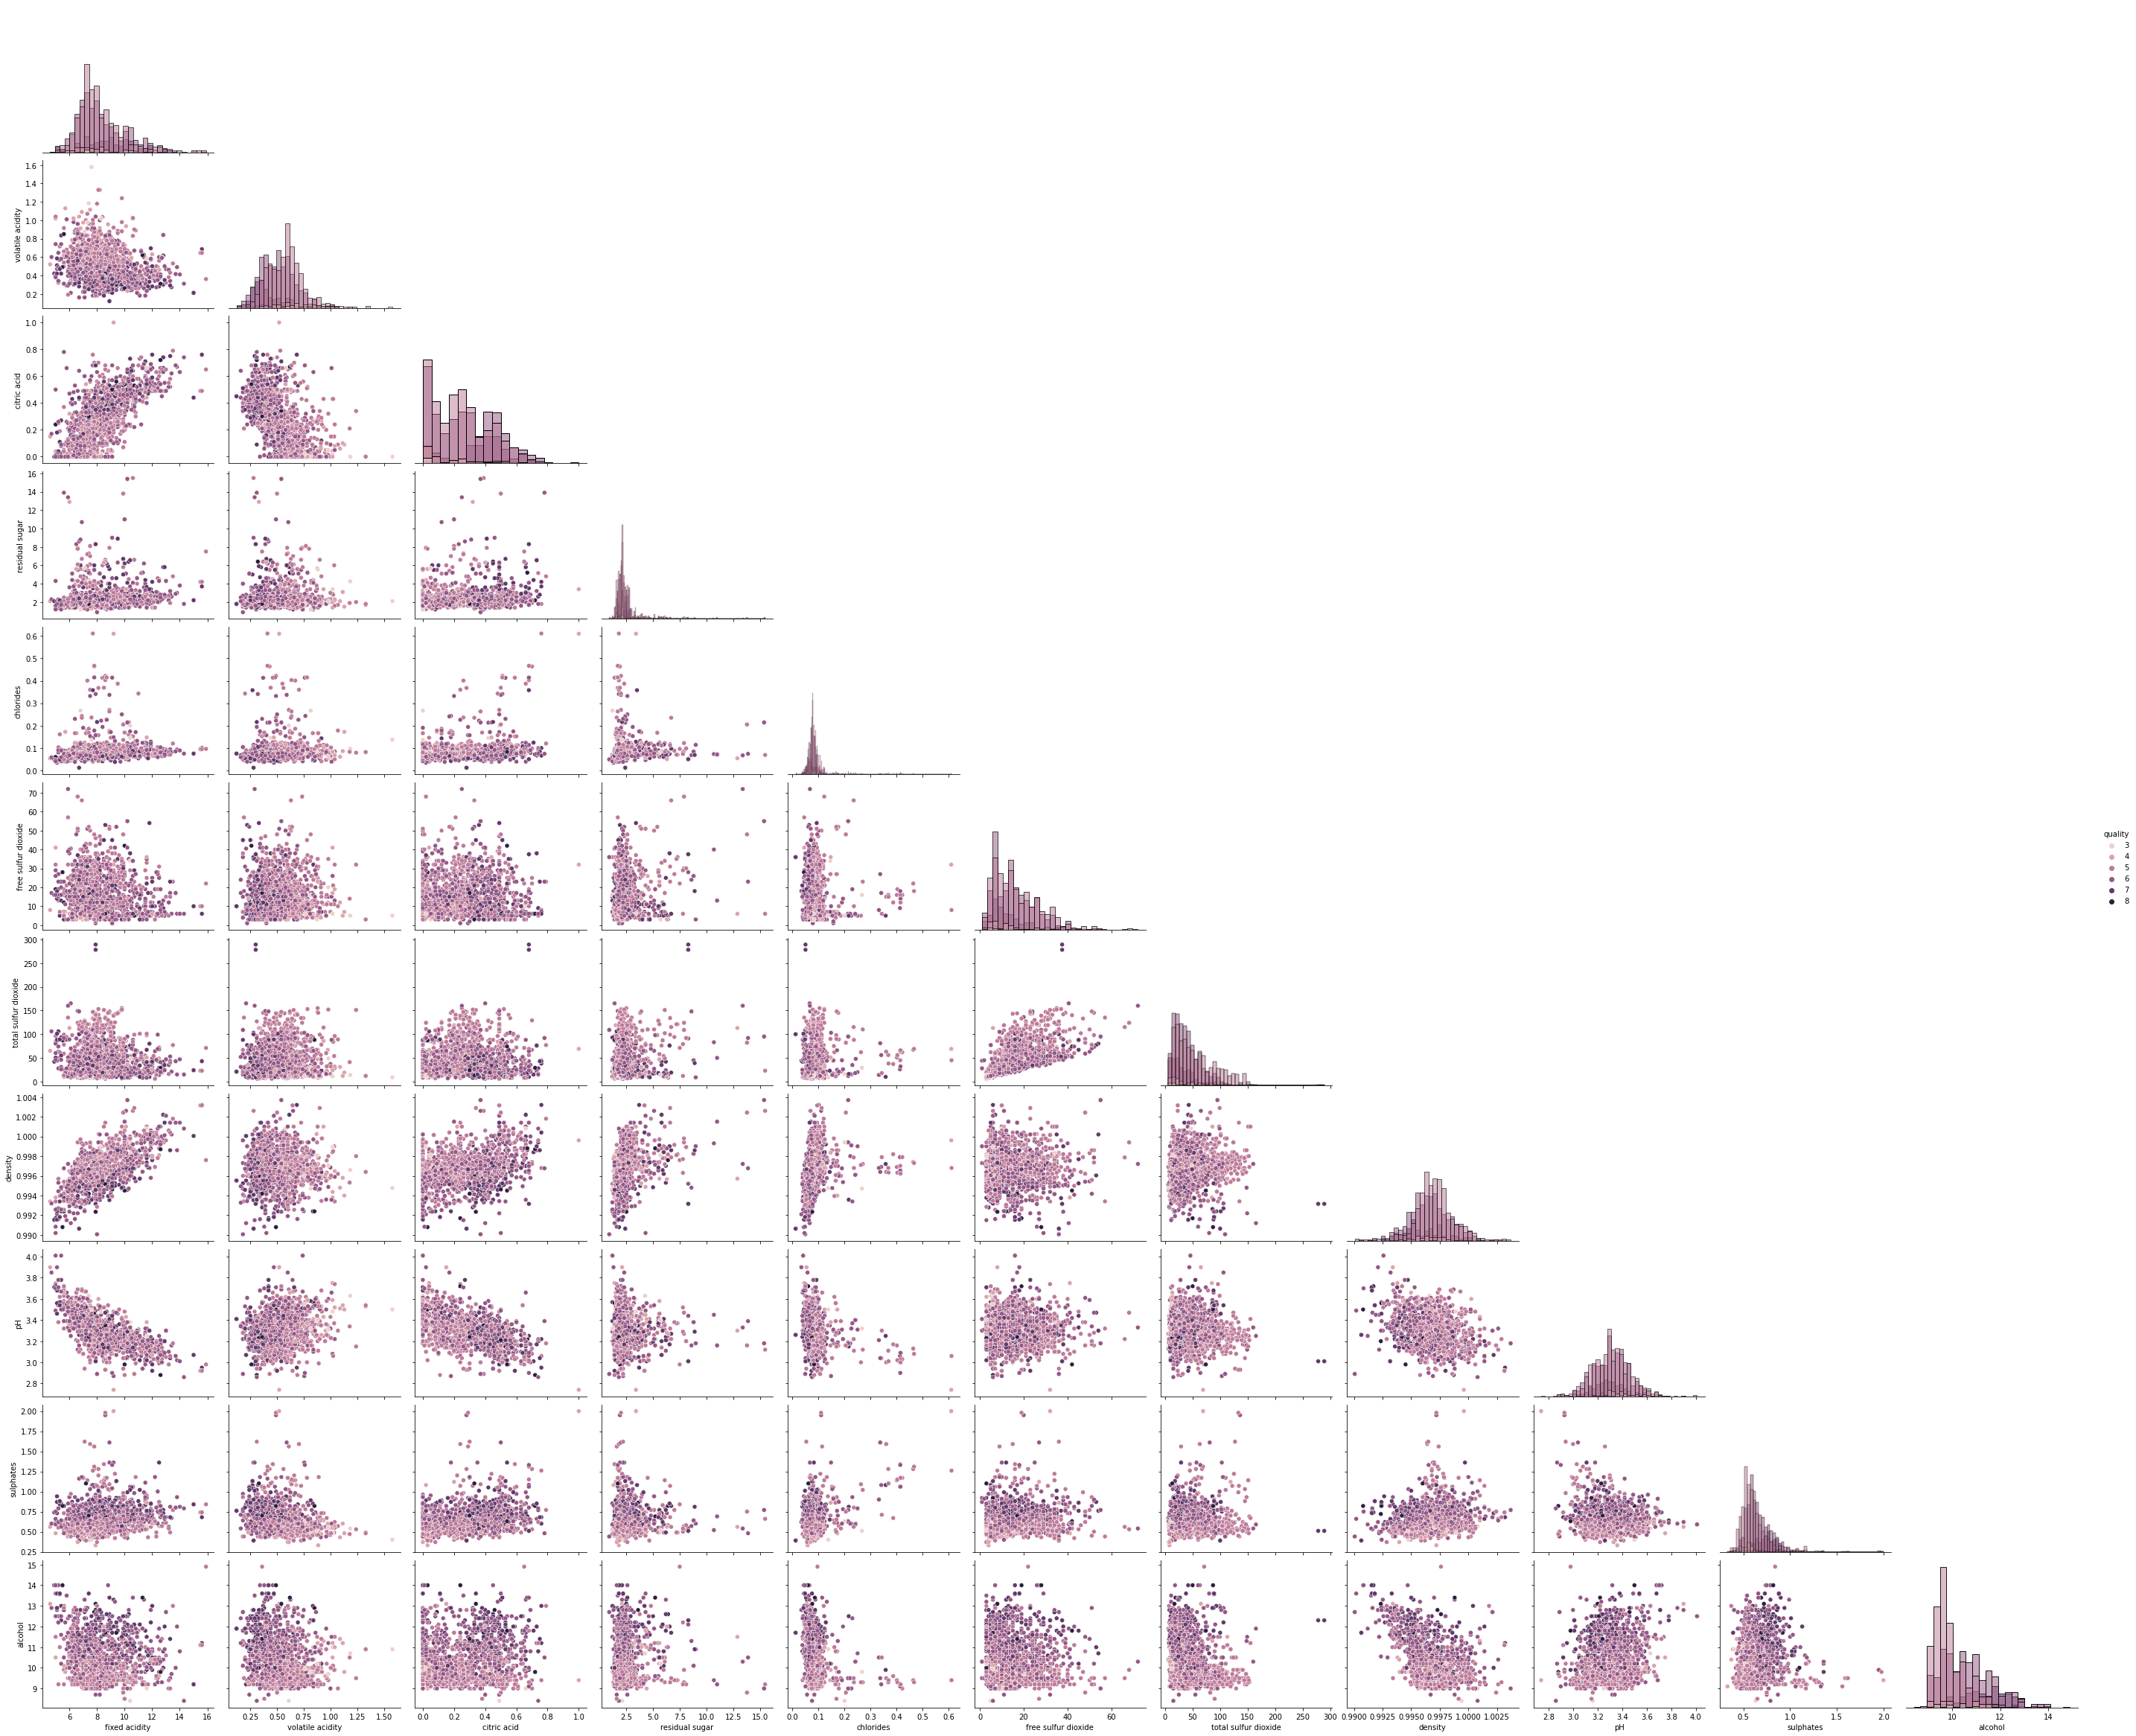

In [15]:
sb.pairplot(data, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True);

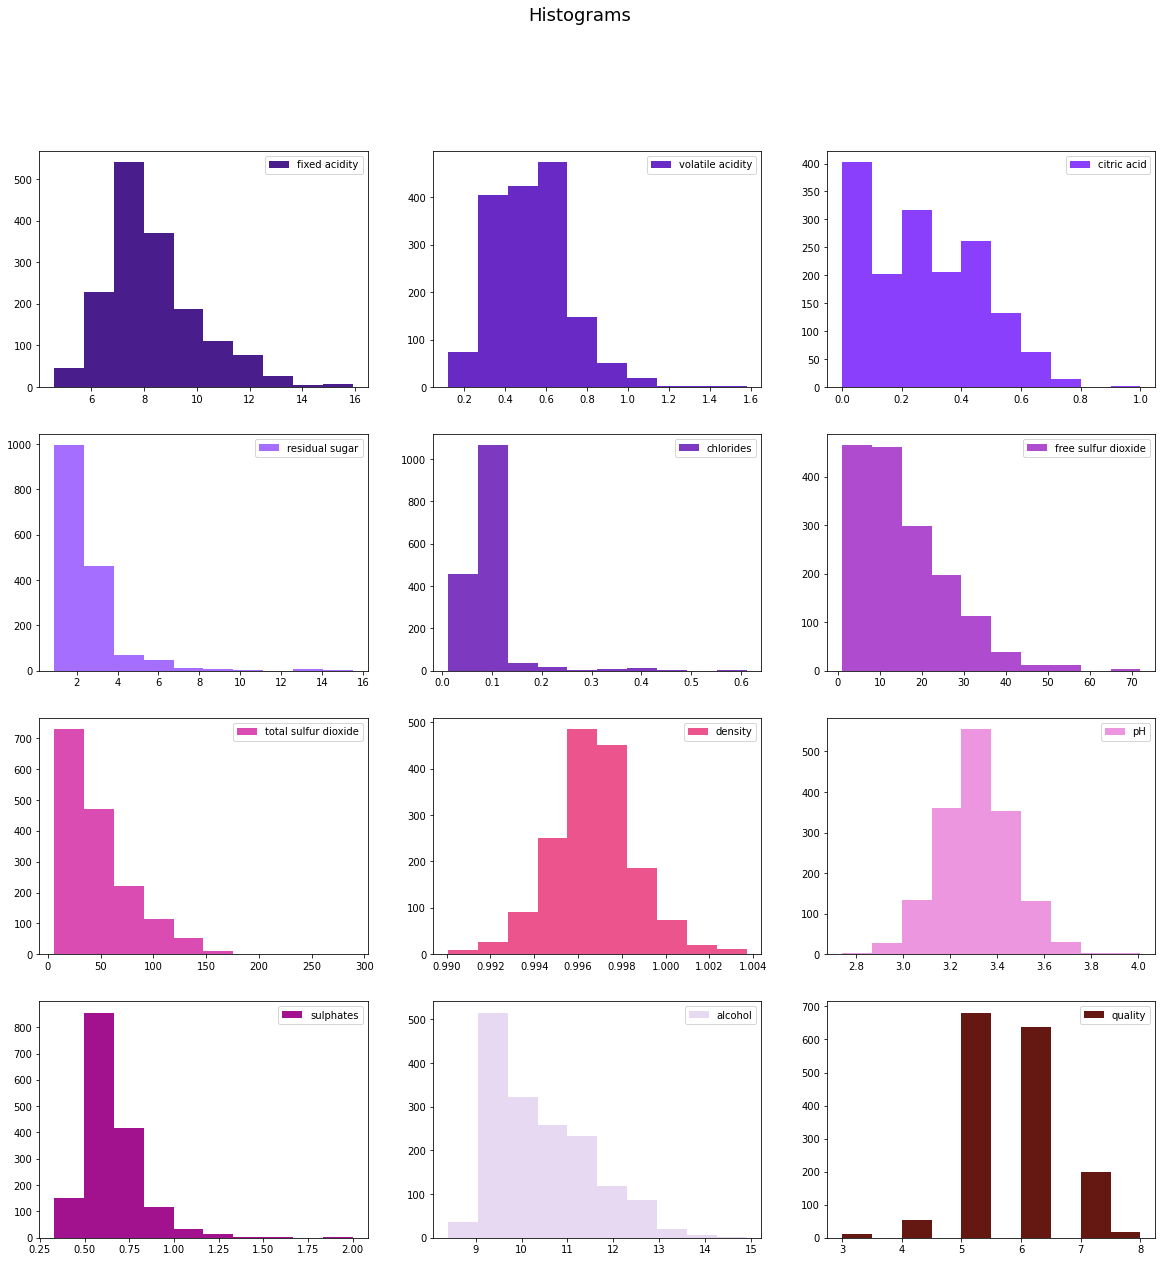

In [16]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(data.columns):
    ax = axes.flatten()[index]
    ax.hist(data[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

<font color = 'Orange'><li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<p>
I will be using KNN classificator, with 5,15,25,35,50 neighbours and will compare the accuracies
</p>


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

Logistic Regression:


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression(multi_class = 'multinomial')
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)

In [21]:
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)
lr_acc_train_score = accuracy_score(Y_train,lr.predict(X_train) )

In [22]:
print(lr_conf_matrix)

[[  1   0   1   1   0   0]
 [  0   1  10   5   1   0]
 [  1   0 128  47   1   0]
 [  0   0  58  85  13   0]
 [  0   0   2  29  14   0]
 [  0   0   0   0   2   0]]


In [23]:
print(lr_acc_score)

0.5725


In [24]:
print(lr_acc_train_score)

0.6180150125104253


KNN:

In [25]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test) 


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))

[[  0   2   0   1   0   0]
 [  0   1   6  10   0   0]
 [  0   5 123  45   4   0]
 [  1   0  54  90  11   0]
 [  0   0   5  21  19   0]
 [  0   0   0   0   2   0]]


In [27]:
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.12      0.06      0.08        17
           5       0.65      0.69      0.67       177
           6       0.54      0.58      0.56       156
           7       0.53      0.42      0.47        45
           8       0.00      0.00      0.00         2

    accuracy                           0.58       400
   macro avg       0.31      0.29      0.30       400
weighted avg       0.56      0.58      0.57       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
accw5=accuracy_score(Y_test, Y_pred)
accw5


0.5825

In [29]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test) 


In [30]:
acc15=accuracy_score(Y_test, Y_pred)
acc15


0.57

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test) 


In [32]:
acc25=accuracy_score(Y_test, Y_pred)
acc25

0.57

In [33]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=35)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test) 


In [34]:
acc35=accuracy_score(Y_test, Y_pred)
acc35

0.56

In [35]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test) 


In [36]:
acc50=accuracy_score(Y_test, Y_pred)
acc50

0.56

Text(0, 0.5, 'Accuracy')

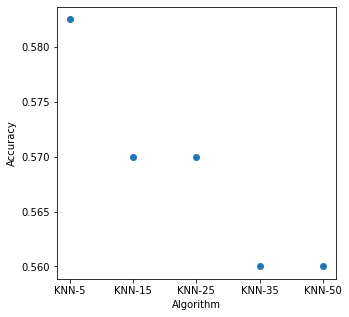

In [37]:
xindex = ['KNN-5', 'KNN-15','KNN-25', 'KNN-35', 'KNN-50']
yindex = [accw5, acc15, acc25, acc35, acc50]

plot = plt.figure(figsize=(5,5))
plt.scatter(xindex, yindex)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

<font color = 'Orange'><li>Build Decision Tree model</li>


In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
model = DecisionTreeRegressor(max_depth=15,max_leaf_nodes=3)
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=3)

In [40]:
Y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

r2_score(Y_test,Y_pred)

0.11912018263585

Decision Tree:

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
Y_pred = model.predict(X_test)

In [45]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.26      0.29      0.28        17
           5       0.67      0.66      0.66       177
           6       0.63      0.64      0.63       156
           7       0.53      0.53      0.53        45
           8       0.00      0.00      0.00         2

    accuracy                           0.61       400
   macro avg       0.35      0.35      0.35       400
weighted avg       0.61      0.61      0.61       400



In [46]:
dt_conf_matrix = confusion_matrix(Y_test, Y_pred)
dt_acc_score = accuracy_score(Y_test, Y_pred)
dt_acc_train_score = accuracy_score(Y_train,model.predict(X_train) )

In [47]:
print(dt_conf_matrix)

[[  0   1   2   0   0   0]
 [  0   5   7   3   2   0]
 [  2   9 116  43   7   0]
 [  0   3  43 100  10   0]
 [  0   1   5  13  24   2]
 [  0   0   0   0   2   0]]


In [48]:
print(dt_acc_score)

0.6125


In [49]:
print(dt_acc_train_score)

1.0


Text(0, 0.5, 'Accuracy')

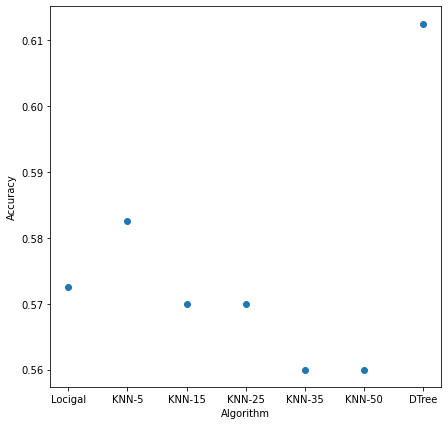

In [50]:
xindex = ['Locigal','KNN-5', 'KNN-15','KNN-25', 'KNN-35', 'KNN-50', "DTree"]
yindex = [lr_acc_score, accw5, acc15, acc25, acc35, acc50, dt_acc_score]

plot = plt.figure(figsize=(7,7))
plt.scatter(xindex, yindex)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

In [51]:
!pip install tpot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from tpot import TPOTClassifier

# tpot = TPOTClassifier(generations=5,population_size=50, verbosity=2, config_dict = 'TPOT light',cv=2,scoring='average_precision', random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=2, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

In [59]:
model.fit(data[data.columns[:-1]],data["quality"])

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5710043804755944

Generation 2 - Current best internal CV score: 0.5710043804755944

Generation 3 - Current best internal CV score: 0.5778864205256571

Generation 4 - Current best internal CV score: 0.5778864205256571

Generation 5 - Current best internal CV score: 0.5778864205256571

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=5, min_samples_split=16, n_estimators=100)


TPOTClassifier(cv=2, generations=5, n_jobs=-1, population_size=50,
               random_state=1, scoring='accuracy', verbosity=2)

In [60]:
from tpot import TPOTClassifier
tpot_clf = TPOTClassifier(verbosity=1,cv = 2,max_eval_time_mins=1)
tpot_clf.fit(X_train,Y_train)



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: KNeighborsClassifier(LogisticRegression(ZeroCount(LogisticRegression(input_matrix, C=15.0, dual=False, penalty=l2)), C=20.0, dual=False, penalty=l2), n_neighbors=50, p=1, weights=distance)
Best pipeline: KNeighborsClassifier(LogisticRegression(ZeroCount(LogisticRegression(input_matrix, C=15.0, dual=False, penalty=l2)), C=20.0, dual=False, penalty=l2), n_neighbors=50, p=1, weights=distance)


TPOTClassifier(cv=2, max_eval_time_mins=1, verbosity=1)

In [64]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)

tpot.fit(X_train, Y_train)

print(tpot.score(X_test, Y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6680718270571827

Generation 2 - Current best internal CV score: 0.6680718270571827

Generation 3 - Current best internal CV score: 0.6680718270571827

Generation 4 - Current best internal CV score: 0.6680718270571827

Generation 5 - Current best internal CV score: 0.6680718270571827

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=26, p=2, weights=distance)
0.67
